In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\saran\\Desktop\\LLM Seminar\\Apps Phase\\LLM_Data_Annotation\\notebooks'

In [3]:
os.chdir('..')

In [4]:
df_predicted = pd.read_csv('data/sentiment/annotated/gpt35/conf_scores_1000_preproc.csv')

In [6]:
df_predicted = pd.read_csv('data/sentiment/annotated/ada/ada_500.csv')

In [7]:
df_predicted.predicted_label.value_counts()

predicted_label
1                                          330
1 for positive, 0 for neutral,              71
positive                                    19
the sentiment in this text is positive.     13
1 is positive, 0 is negative.                7
1: positive                                  6
the sentiment in this text is negative.      4
positive: 1\n\n neutral:                     4
the sentiment of this text is positive.      3
1 is positive.                               2
the sentiment of this text is negative.      2
positive: 1\n\nnoun                          2
1, 2                                         2
1\n\n0\n\n1                                  1
the text in this image is in the             1
positive: i have to go to                    1
1 positive                                   1
1\n\n neutral\n\n2                           1
1: perky\n2: per                             1
1: neutral                                   1
1: daniel has won dsds.                     

In [5]:
df_predicted[df_predicted.confidence_score<1]

,Unnamed: 0,text,predicted_labels,confidence_score
5,5,http://www.dothebouncy.com/smf - some shameles...,positive,0.666667
16,16,"S`ok, trying to plot alternatives as we speak...",negative,0.666667
22,22,is cleaning the house for her family who is co...,positive,0.333333
27,27,On the way to Malaysia...no internet access to...,neutral,0.333333
34,34,"Ahhh, I slept through the game. I`m gonna tr...",positive,0.666667
...,...,...,...,...
888,888,Woke up at 7:50 then fell back to sleep. Woke ...,positive,0.666667
913,913,has broken off the fb wedding so sadly no long...,negative,0.666667
932,933,Buried under more web changes. Going to make l...,negative,0.666667
977,978,Ha! Thanks Bryan! And don`t remind me about t...,positive,0.333333


In [6]:
df_original = pd.read_csv('data/sentiment/original/train.csv', encoding= 'unicode_escape')

In [7]:
common_texts = df_predicted['text'].values
df_filtered_original = df_original[df_original['text'].isin(common_texts)]

In [9]:
df_combined = pd.merge(df_filtered_original, df_predicted, on='text', how='inner')

In [15]:
df_combined['is_correct'] = (df_combined['sentiment'] == df_combined['predicted_labels']).astype(int)

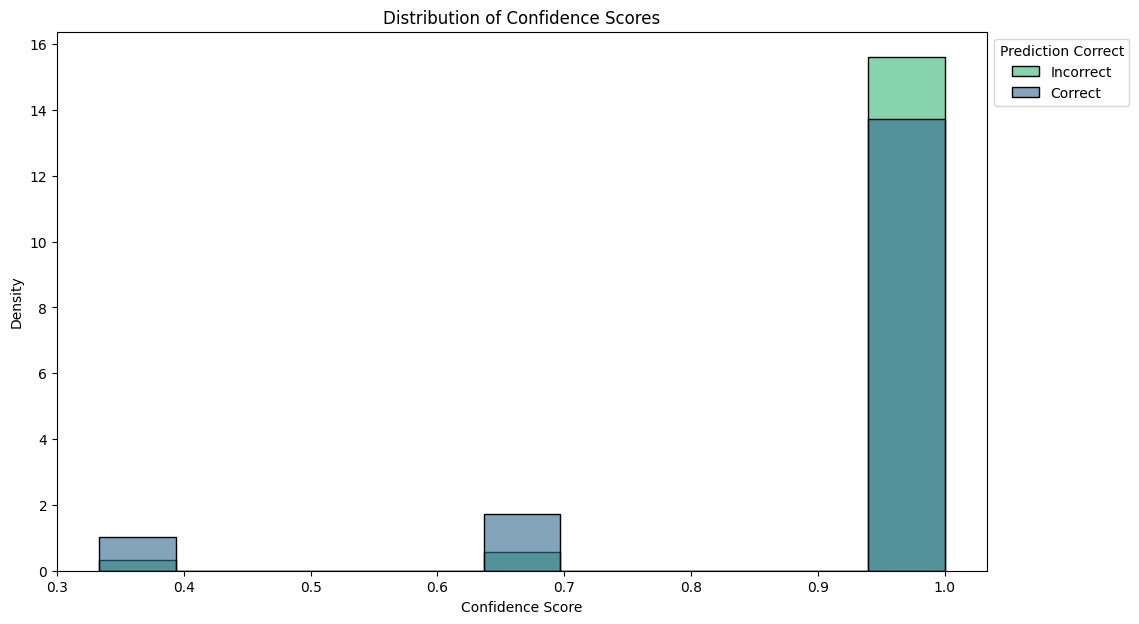

In [74]:
plt.figure(figsize=(12, 7))
sns.histplot(df_combined, x='confidence_score', hue='is_correct', element="bars", stat="density", common_norm=False, palette="viridis", alpha=0.6)
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Density')
plt.legend(title='Prediction Correct', labels=['Incorrect', 'Correct'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()


In [6]:
unannotated_small = pd.read_csv('data/sentiment/unannotated/unannotated_sentiment_dataset.csv', index_col =0)

In [7]:
unannotated_small.iloc[0:200].to_csv('data/sentiment/unannotated/unannotated_200.csv')

In [8]:
unannotated_small.iloc[0:50].to_csv('data/sentiment/unannotated/unannotated_50.csv')